In [1]:
import numpy as np
import pandas as pd
from generate_parcel_data import generate_data_one_simulation
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
(
    mode_Ns,
    mode_means,
    mode_stdevs,
    mode_kappas,
    velocity,
    initial_temperature,
    initial_pressure,
) = (
    [347898.0, 4.25496e5],
    [6.92601e-8, 4.02379e-6],
    [1.38781, 2.56175],
    [1.10534, 0.509367],
    0.0868459,
    294.983,
    52974.6,
)

In [5]:
n_sd_range = np.linspace(50, 1000, 20)
n_sd_study_sim_results = []
for n_sd in n_sd_range:
    n_sd = int(n_sd)
    print(f"Running with n_sd = {n_sd}")
    df = generate_data_one_simulation(mode_Ns,
        mode_means,
        mode_stdevs,
        mode_kappas,
        velocity,
        initial_temperature,
        initial_pressure,
        n_sd=n_sd)[0]
    n_sd_study_sim_results.append(df)

Running with n_sd = 50
Running with n_sd = 100
Running with n_sd = 150
Running with n_sd = 200
Running with n_sd = 250
Running with n_sd = 300
Running with n_sd = 350
Running with n_sd = 400
Running with n_sd = 450
Running with n_sd = 500
Running with n_sd = 550
Running with n_sd = 600
Running with n_sd = 650
Running with n_sd = 700
Running with n_sd = 750
Running with n_sd = 800
Running with n_sd = 850
Running with n_sd = 900
Running with n_sd = 950
Running with n_sd = 1000


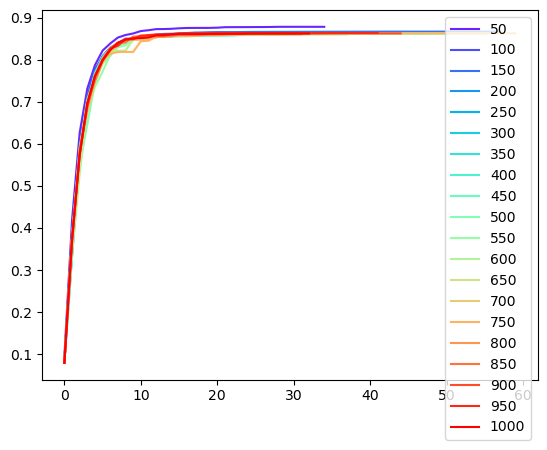

In [18]:
for df, n_sd in zip(n_sd_study_sim_results, n_sd_range):
    plt.plot(df["mode_1_act_frac_S_interp"], color=plt.cm.rainbow(n_sd / 1000), label=int(n_sd))
plt.legend()

In [3]:
dz_range = [0.01, 0.1, 1, 10]
dz_study_sim_results = []
for dz in dz_range:
    print(f"Running with dz = {dz}")
    df = generate_data_one_simulation(mode_Ns,
        mode_means,
        mode_stdevs,
        mode_kappas,
        velocity,
        initial_temperature,
        initial_pressure,
        dz_parcel=dz,
        initial_rh=1)[0]
    dz_study_sim_results.append(df)

Running with dz = 0.01
Process 66322: IndexError: invalid index to scalar variable.


ValueError: Per-column arrays must each be 1-dimensional

ValueError: setting an array element with a sequence.

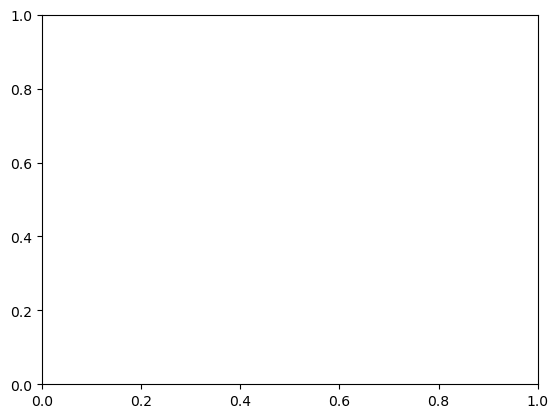

In [6]:
for i, (df, dz) in enumerate(zip(dz_study_sim_results[:1], dz_range[:1])):
    plt.plot(df["time"] * df["velocity"], df["mode_1_smallest_dry_radius_activated"], color=plt.cm.rainbow(i / len(dz_study_sim_results)), label=dz)
plt.legend()

In [16]:
df["mode_1_smallest_dry_radius_activated"][0]

array([[3.28092403e-08, 3.38252130e-08, 3.48726463e-08, 3.59525144e-08,
        3.70658219e-08, 3.82136040e-08, 3.93969285e-08, 4.06168958e-08,
        4.18746407e-08, 4.31713330e-08, 4.45081787e-08, 4.58864213e-08,
        4.73073426e-08, 4.87722642e-08, 5.02825487e-08, 5.18396007e-08,
        5.34448685e-08, 5.50998451e-08, 5.68060697e-08, 5.85651294e-08,
        6.03786603e-08, 6.22483490e-08, 6.41759346e-08, 6.61632099e-08,
        6.82120233e-08, 7.03242804e-08, 7.25019457e-08, 7.47470447e-08,
        7.70616656e-08, 7.94479611e-08, 8.19081508e-08, 8.44445228e-08,
        8.70594363e-08, 8.97553233e-08, 9.25346913e-08, 9.54001254e-08,
        9.83542906e-08, 1.01399935e-07, 1.04539890e-07, 1.07777078e-07,
        1.11114509e-07, 1.14555286e-07, 1.18102611e-07, 1.21759783e-07,
        1.25530203e-07, 1.29417377e-07, 1.33424922e-07, 1.37556566e-07,
        1.41816149e-07, 1.46207636e-07, 4.71242760e-07, 5.14352239e-07,
        5.61405390e-07, 6.12762983e-07, 6.68818789e-07, 7.300026